# Data Cleaning

**Bad Data could be**

1. Wrong data

2. Data in wrong format

3. Duplicates

4. Empty cells/Missing values

5. Outliers

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({"Age":[15,18,"18",19.4,"20+"],"Gender":["male","female","female","female","male"]})

df

,Age,Gender
0,15,male
1,18,female
2,18,female
3,19.4,female
4,20+,male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     5 non-null      object
 1   Gender  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [4]:
df["Age"].unique()

array([15, 18, '18', 19.4, '20+'], dtype=object)

**1. Wrong Data**

 solution:-  Replace
 
 **syntax :-**df["columns name].replace({old:new},inplace=True)

In [5]:
df["Age"].replace({"20+":20},inplace=True)
df

,Age,Gender
0,15,male
1,18,female
2,18,female
3,19.4,female
4,20,male


**2. wrong Data type**

- solution :- convert the Data type

**syntax :- **df["columns name"].astype()

In [6]:
df["Age"]=df["Age"].astype("float")
df

,Age,Gender
0,15.0,male
1,18.0,female
2,18.0,female
3,19.4,female
4,20.0,male


**3.Duplicates**

- solution :- Remove

- **syntax :-** df.duplicated()

In [7]:
# to check the duplicated records
# index number 2==1 , so that in output its show True
df.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [8]:
# total number of duplicates in given data
df.duplicated().sum()

1

In [9]:
# to extract duplicated records
df[df.duplicated()]

,Age,Gender
2,18.0,female


In [10]:
# to extract original records / non duplicate records
df[~df.duplicated()]

,Age,Gender
0,15.0,male
1,18.0,female
3,19.4,female
4,20.0,male


In [7]:
# to remove the duplicates
df.drop_duplicates(ignore_index=True)

,Age,Gender
0,15.0,male
1,18.0,female
2,19.4,female
3,20.0,male


# 4. Empty cells / missing values

- Solution :- Either remove or replace

In [8]:
df = pd.DataFrame({"Age":[15,np.nan,24,19,20,22],"Gender":["male",np.nan,"female","female","male",np.nan]})
df

,Age,Gender
0,15.0,male
1,NaN,NaN
2,24.0,female
3,19.0,female
4,20.0,male
5,22.0,NaN


In [9]:
# to check the missing values in records
df.isnull()

,Age,Gender
0,False,False
1,True,True
2,False,False
3,False,False
4,False,False
5,False,True


In [10]:
# to check the total missing values
df.isnull().sum()

Age       1
Gender    2
dtype: int64

In [11]:
# to check the percentage of missing values in each variables
df.isnull().sum()/len(df)*100

Age       16.666667
Gender    33.333333
dtype: float64

# option-1 :-Remove the rows that contain missing values

In [12]:
df1=df.dropna()
df1

,Age,Gender
0,15.0,male
2,24.0,female
3,19.0,female
4,20.0,male


# option-2 :- Replace the nan values

- fill with value

- continous variable --> Replace with either mean or median

- Discrete variable --> Replace with only mode

In [13]:
# to fill with value
df["Age"].fillna(25)

0    15.0
1    25.0
2    24.0
3    19.0
4    20.0
5    22.0
Name: Age, dtype: float64

In [14]:
# to fill with mean value
df["Age"].fillna(df["Age"].mean())     

0    15.0
1    20.0
2    24.0
3    19.0
4    20.0
5    22.0
Name: Age, dtype: float64

In [15]:
# to fill with median value
df["Age"].fillna(df["Age"].median())

0    15.0
1    20.0
2    24.0
3    19.0
4    20.0
5    22.0
Name: Age, dtype: float64

In [16]:
# to fill with mode
df["Gender"].mode()

0    female
1      male
Name: Gender, dtype: object

In [17]:
df["Gender"].fillna(df["Gender"].mode()[0])

0      male
1    female
2    female
3    female
4      male
5    female
Name: Gender, dtype: object

In [18]:
df["Gender"].fillna(df["Gender"].mode()[1])

0      male
1      male
2    female
3    female
4      male
5      male
Name: Gender, dtype: object

# 5.outliers

In [19]:
df = pd.DataFrame({"marks":[10,11,12,25,25,27,31,33,34,34,36,36,43,50,59]})
df

,marks
0,10
1,11
2,12
3,25
4,25
5,27
6,31
7,33
8,34
9,34


**various way of finding the outlier**

- 1.Boxplot

 identify outliers based on Boxplot

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

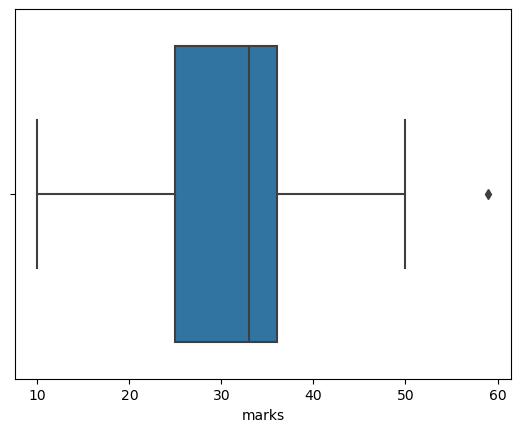

In [21]:
sns.boxplot(x=df["marks"])
plt.show()

 Identifier outliers based on IQR

In [22]:
# Q1 calculation
Q1=df["marks"].quantile(0.25)
print("Q1:",Q1)

# Q3 calculation
Q3=df["marks"].quantile(0.75)
print("Q3:",Q3)

# IQR calculation
IQR=Q3-Q1
print("IQR:",IQR)

# calculation lower limit
lower_limit = Q1-(1.5*IQR)
print("lower_limit:",lower_limit)

# calculation upper limit
upper_limit = Q3+(1.5*IQR)
print("upper_limt:",upper_limit)


Q1: 25.0
Q3: 36.0
IQR: 11.0
lower_limit: 8.5
upper_limt: 52.5


In [23]:
df.describe()

,marks
count,15.000000
mean,31.066667
std,13.760537
min,10.000000
25%,25.000000
50%,33.000000
75%,36.000000
max,59.000000


**Outlier Data**

In [26]:
df[(df["marks"]<lower_limit) | (df["marks"]>upper_limit)]

,marks
14,59


**Solution: 3R Technique**

1. Remove (remove the outliers from our dataset)

2. Replace the ouliers

   • Rectify or Replace --> (data entry error) ---> Ask and confirm it from the Data Engineering team.
    
   • Replace with upper limit & lower limit based on IQR

3. Retain (consider for analysis) ---> Treat them separately



**Remove**

In [28]:
df.drop(index=[14])

,marks
0,10
1,11
2,12
3,25
4,25
5,27
6,31
7,33
8,34
9,34


**Replace**

- Based on confirmation from data engineer team / based on research / based on domain expertise

- replace based on statistics

- **winsorization**-replace the outliers statisticaly with lower limit & upper limit values

In [32]:
df["marks"]=df["marks"].clip(lower=8.5,upper=52.5)
df

,marks
0,10.0
1,11.0
2,12.0
3,25.0
4,25.0
5,27.0
6,31.0
7,33.0
8,34.0
9,34.0


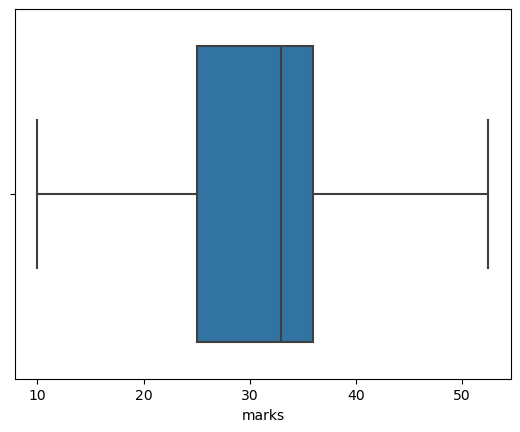

In [33]:
sns.boxplot(x=df["marks"])
plt.show()